In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython.display import display

In [70]:
df = pd.read_csv("movies.csv",encoding="latin1")
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [12]:
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [13]:
df.shape

(15509, 10)

In [14]:
df.describe 

<bound method NDFrame.describe of                                      Name    Year  Duration            Genre  \
0                                             NaN       NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)     109.0            Drama   
2                             #Homecoming  (2021)      90.0   Drama, Musical   
3                                 #Yaaram  (2019)     110.0  Comedy, Romance   
4                       ...And Once Again  (2010)     105.0            Drama   
...                                   ...     ...       ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)       NaN           Action   
15505                               Zulmi  (1999)     129.0    Action, Drama   
15506                           Zulmi Raj  (2005)       NaN           Action   
15507                       Zulmi Shikari  (1988)       NaN           Action   
15508                        Zulm-O-Sitam  (1998)     130.0    Action, Drama   

     

In [15]:
df['Genre'].nunique()

485

In [16]:
df['Genre'].head()

0              Drama
1              Drama
2     Drama, Musical
3    Comedy, Romance
4              Drama
Name: Genre, dtype: object

In [17]:
df.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [18]:
df.Rating.unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [19]:
df['Duration'].unique()

array([ nan, 109.,  90., 110., 105., 147., 142.,  59.,  82., 116.,  96.,
       120., 161., 166., 102.,  87., 132.,  66., 146., 112., 168., 158.,
       126.,  94., 138., 124., 144., 157., 136., 107., 113.,  80., 122.,
       149., 148., 130., 121., 188., 115., 103., 114., 170., 100.,  99.,
       140., 128.,  93., 125., 145.,  75., 111., 134.,  85., 104.,  92.,
       137., 127., 150., 119., 135.,  86.,  76.,  70.,  72., 151.,  95.,
        52.,  89., 143., 177., 117., 123., 154.,  88., 175., 153.,  78.,
       139., 133., 101., 180.,  60.,  46., 164., 162., 171., 160., 152.,
        62., 163., 165., 141., 210., 129., 156., 240., 172., 155., 118.,
       167., 106., 193.,  57., 108.,  45., 195., 174.,  81., 178.,  58.,
       184.,  97.,  98., 131., 176., 169.,  77.,  91.,  84., 173.,  74.,
        67., 181., 300.,  79.,  65.,  48., 183., 159.,  83.,  68.,  49.,
       201.,  64., 186.,  50.,  69., 207.,  55.,  61., 185., 187., 216.,
        63.,  54., 198.,  51.,  71.,  73., 218., 19

In [20]:
df.groupby(['Genre']).count()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,,
Action,1289,1265,262,417,417,1249,1207,1124,1005
"Action, Adventure",41,41,17,24,24,41,40,39,39
"Action, Adventure, Biography",1,1,1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,41,37,40,40,42,42,42,42
"Action, Adventure, Crime",19,19,11,16,16,19,19,19,19
...,...,...,...,...,...,...,...,...,...
"Thriller, Action",2,2,1,1,1,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1,1,1
"Thriller, Mystery",3,3,2,3,3,3,3,3,3


In [21]:
df["Director"].value_counts().head(6)

Director
Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     47
Nanabhai Bhatt     46
Name: count, dtype: int64

In [22]:
df.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [23]:
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)

In [25]:
df['Rating'].fillna(df['Rating'].mode().max(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [26]:
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [40]:
def Bars(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [41]:
def Hist(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [42]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()   

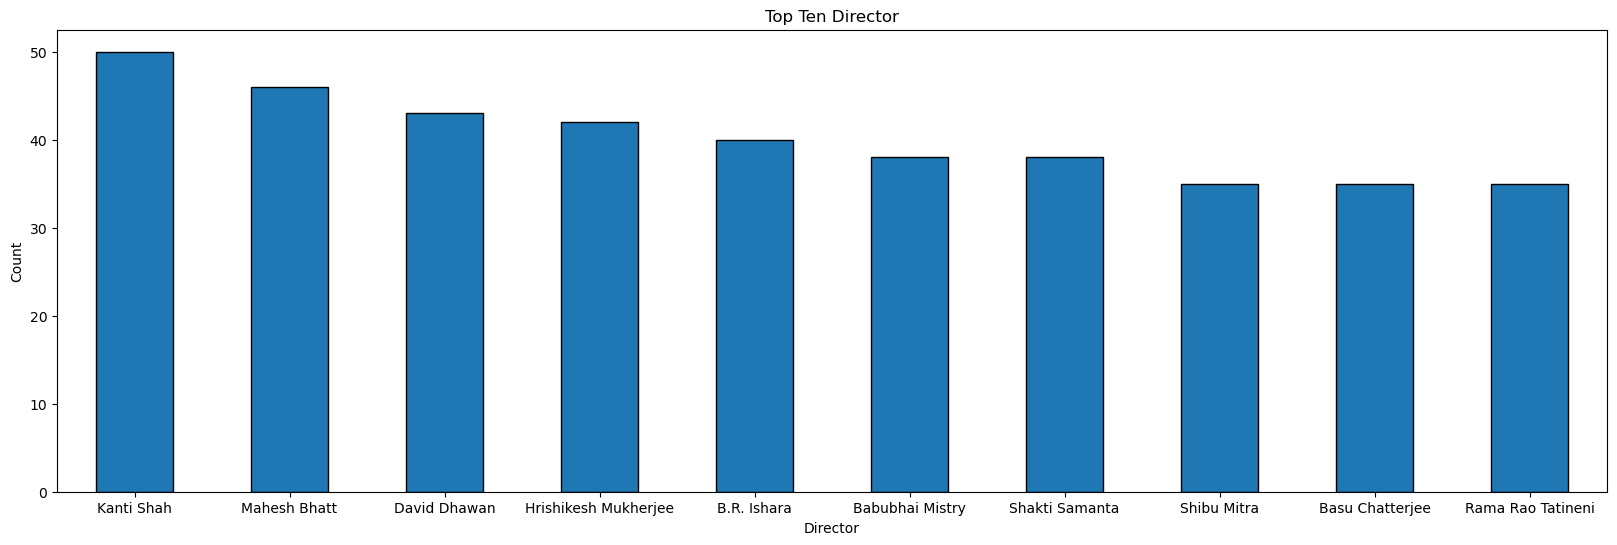

In [43]:
Bars("Director")

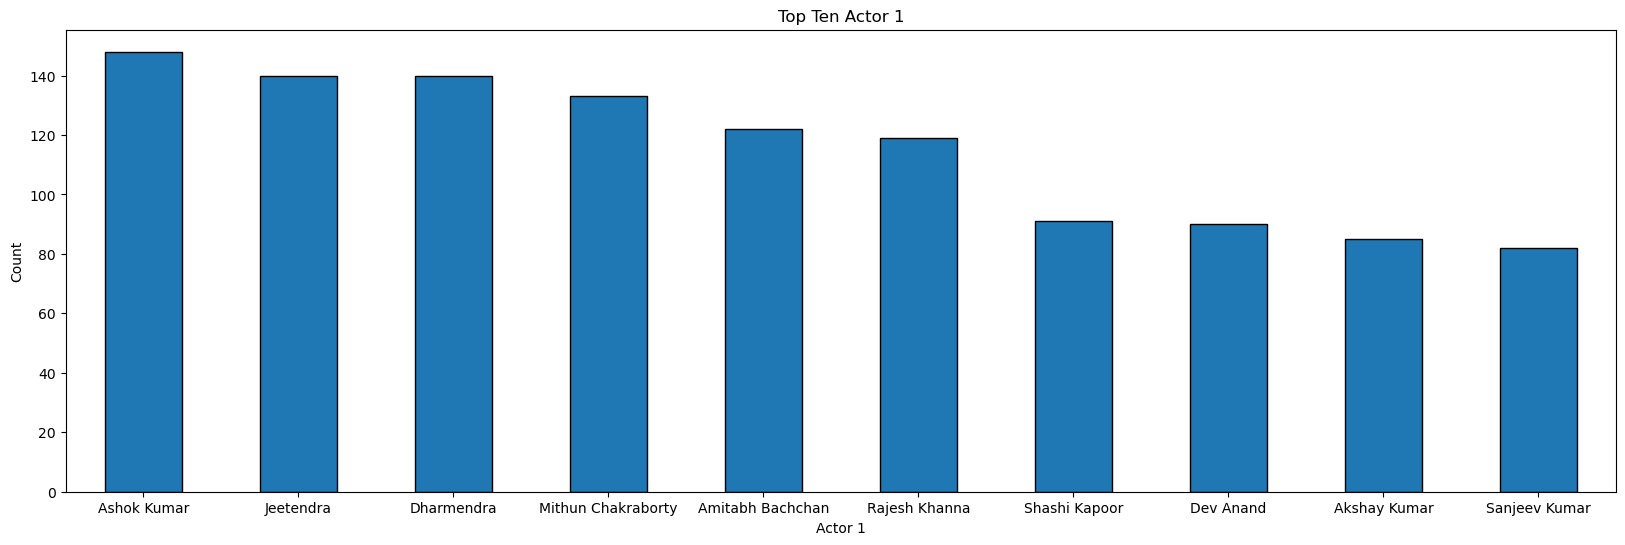

In [44]:
Bars("Actor 1")

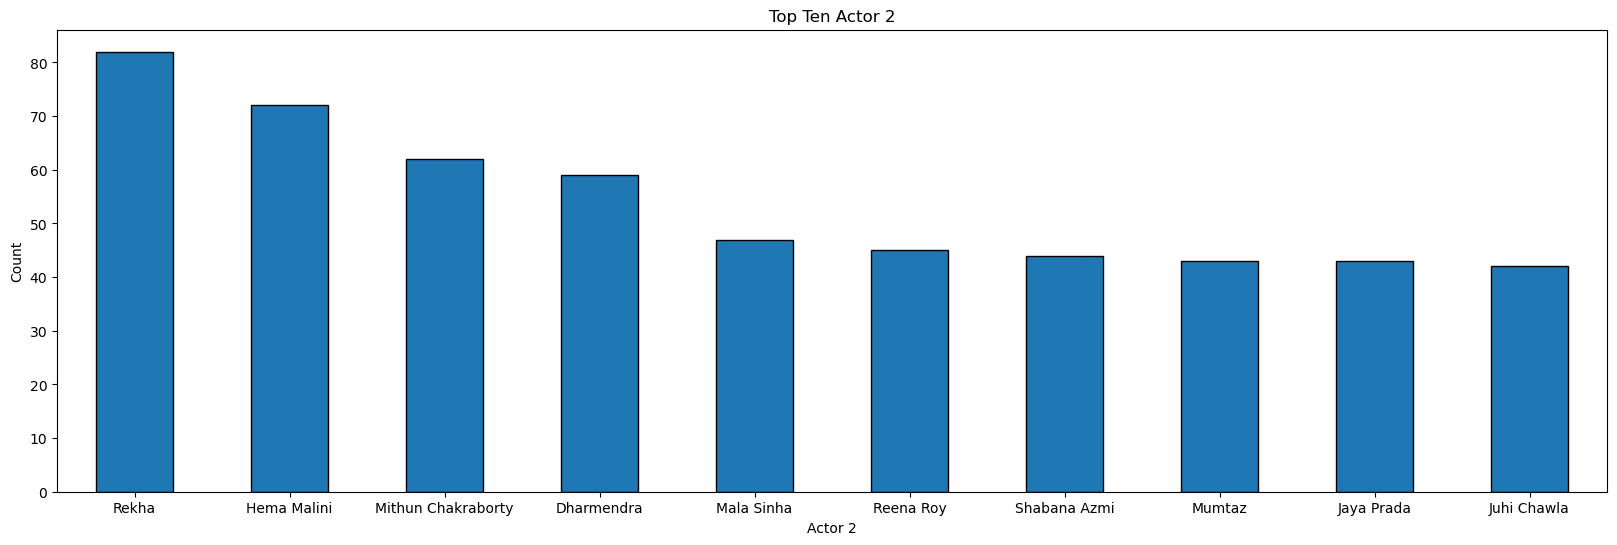

In [45]:
Bars("Actor 2")

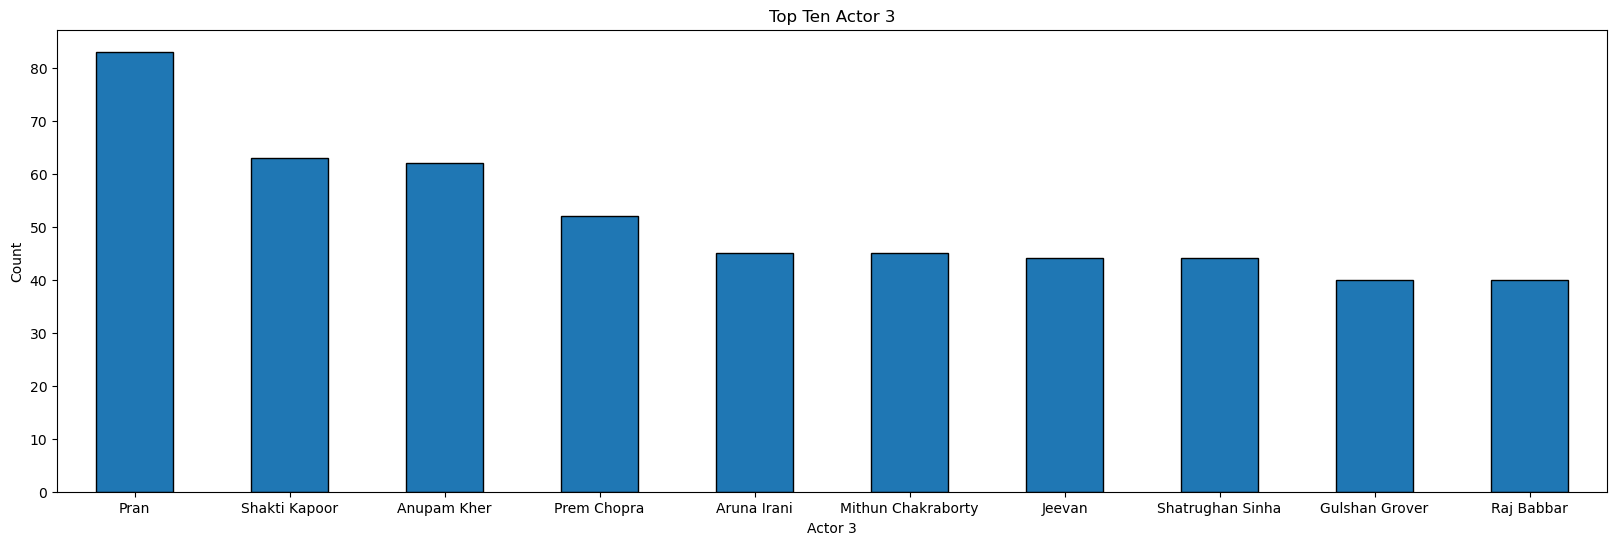

In [46]:
Bars("Actor 3")

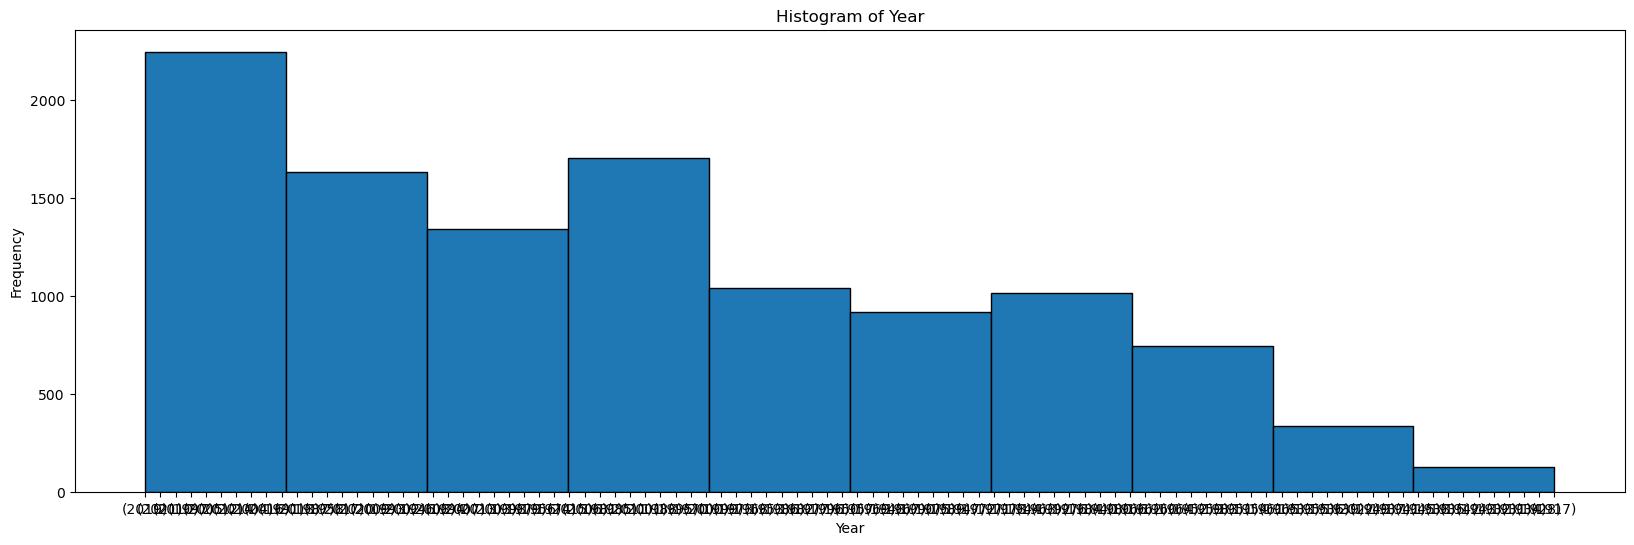

In [47]:
Hist("Year")

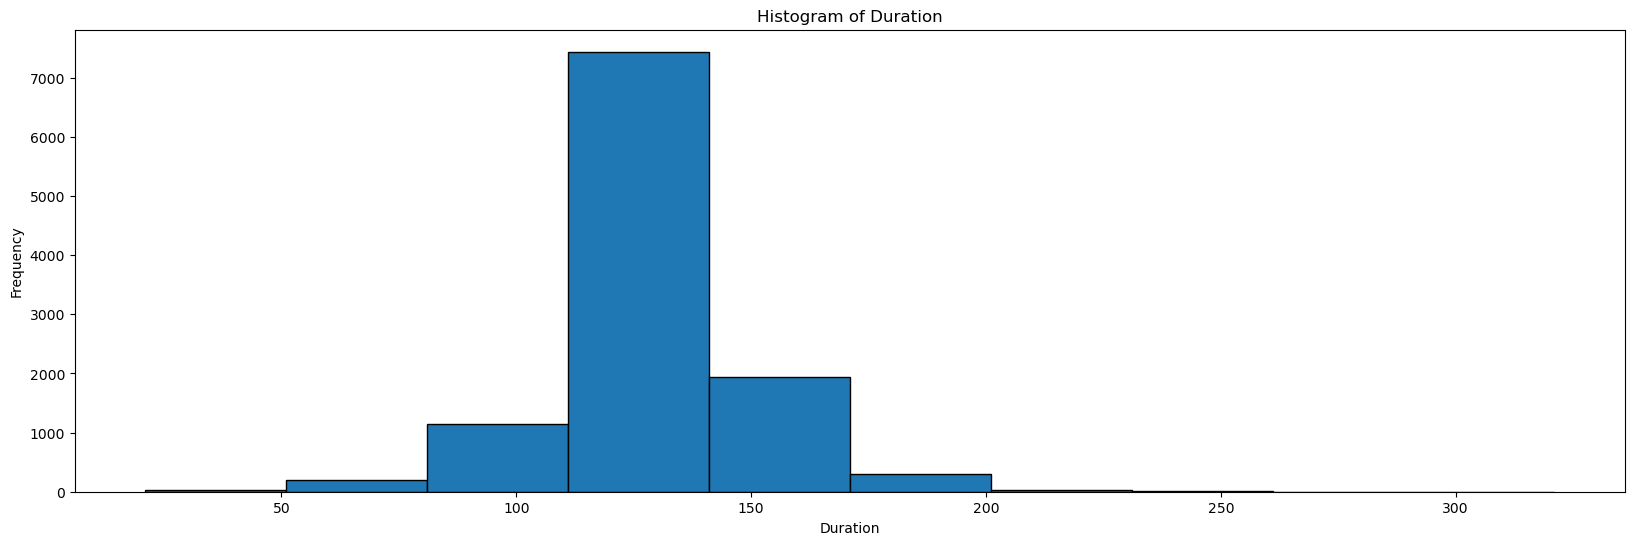

In [48]:
Hist("Duration")

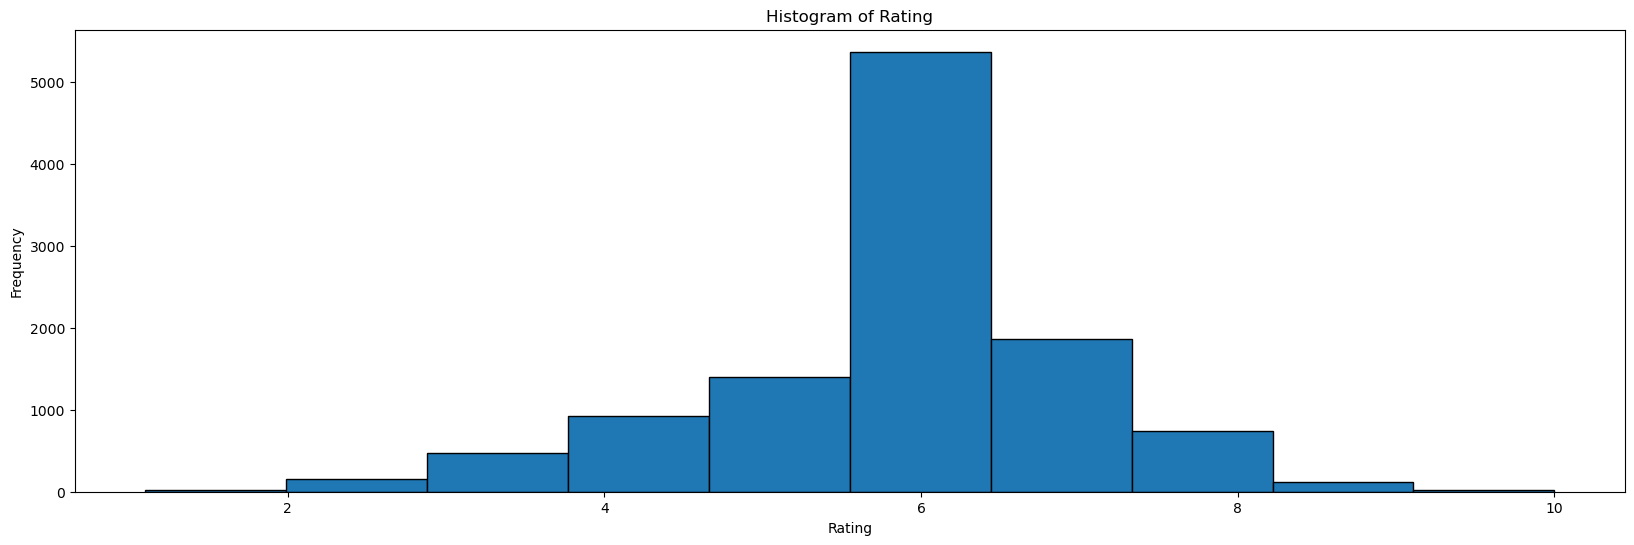

In [49]:
Hist("Rating")

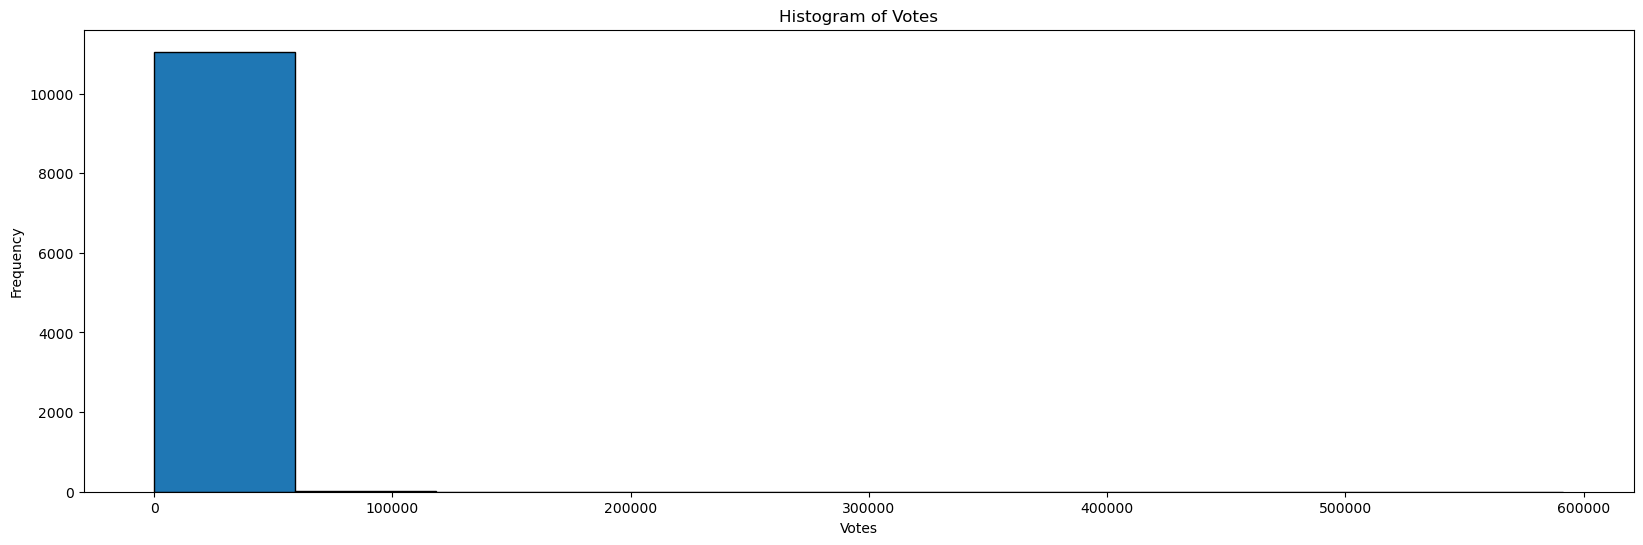

In [50]:
Hist("Votes")

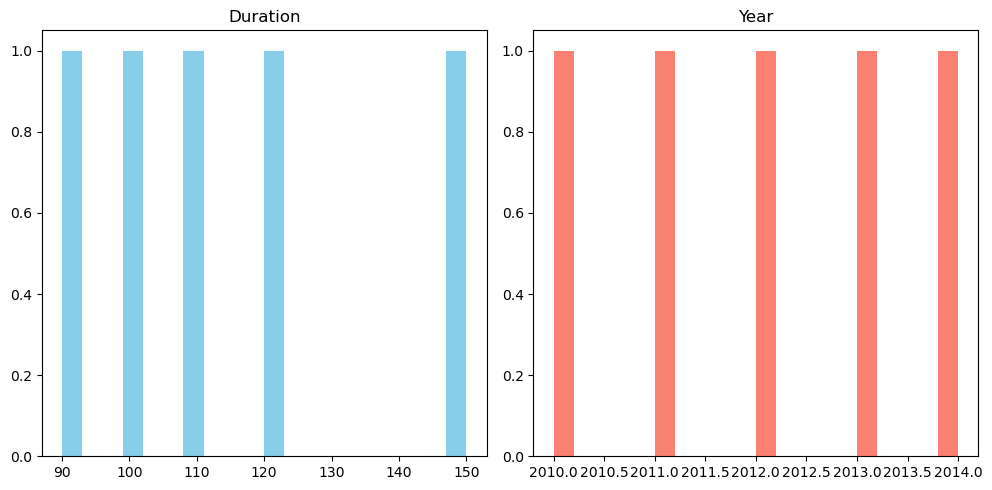

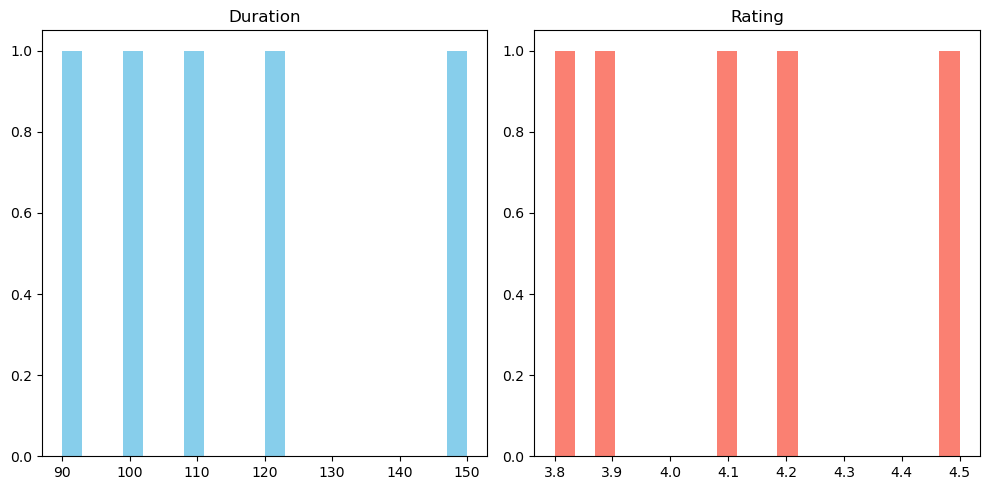

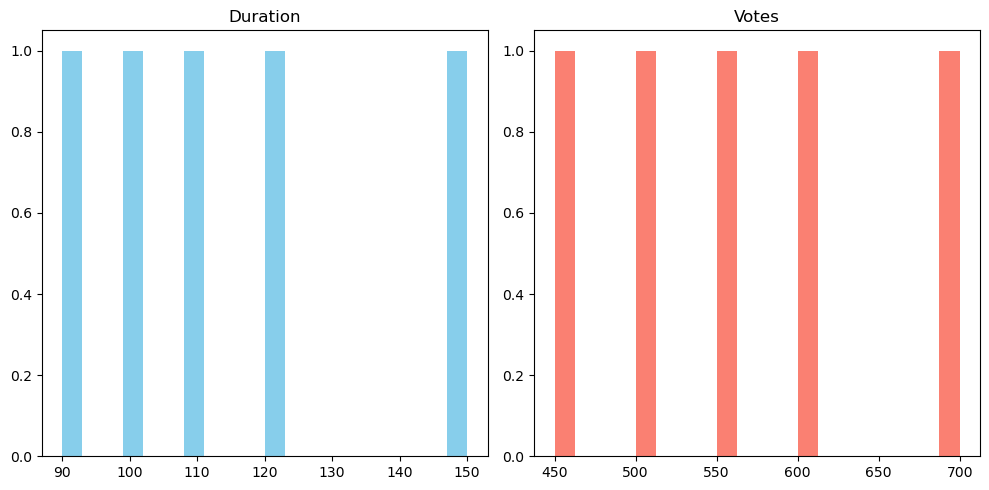

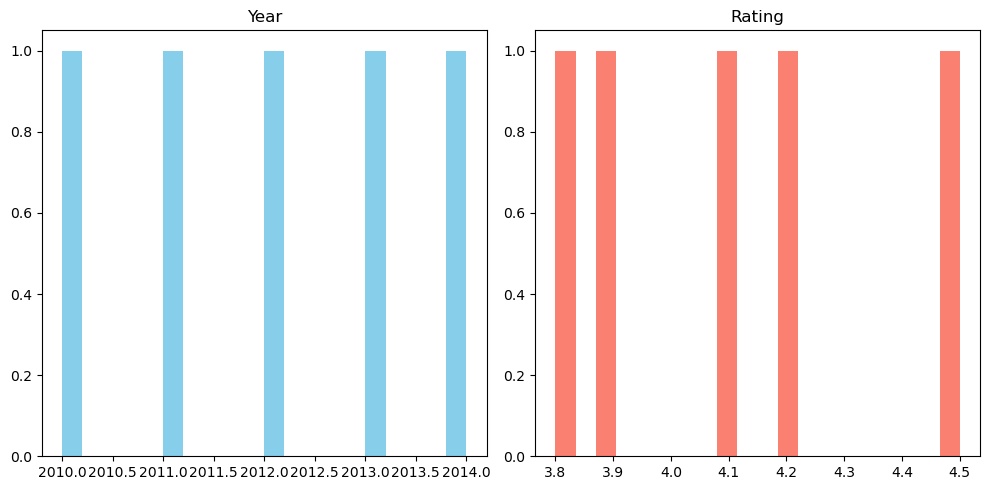

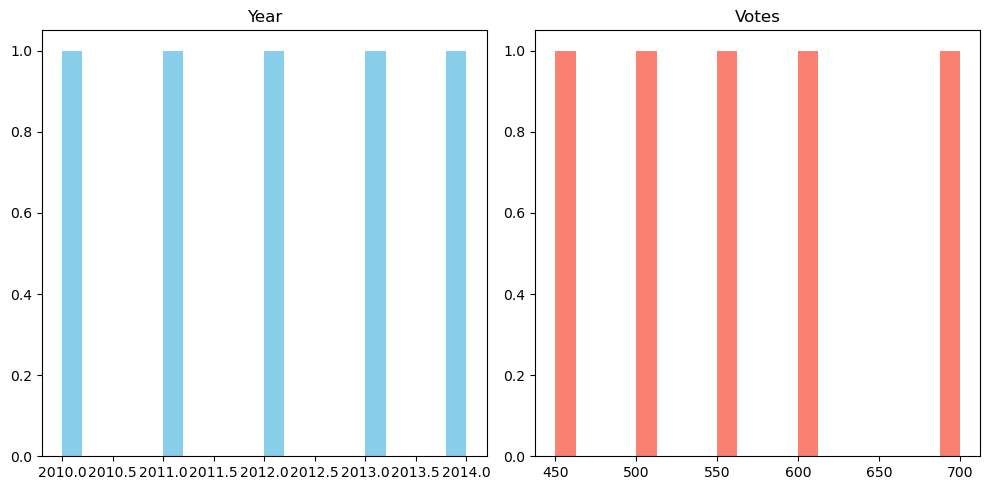

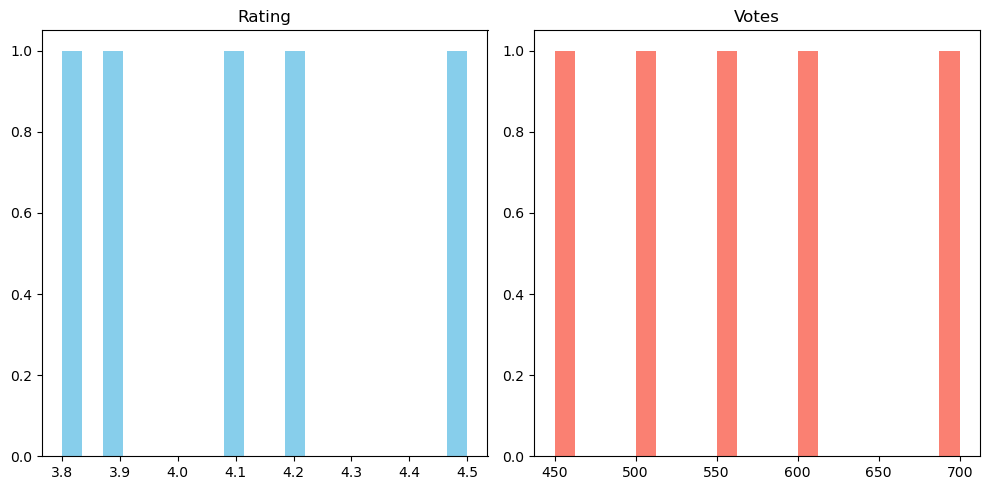

In [68]:
from itertools import combinations

def plot(data, col1, col2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data[col1], bins=20, color='skyblue')
    plt.title(col1)

    plt.subplot(1, 2, 2)
    plt.hist(data[col2], bins=20, color='salmon')
    plt.title(col2)

    plt.tight_layout()
    plt.show()
    
data = {
    "Duration": [100, 150, 120, 90, 110],
    "Year": [2010, 2011, 2012, 2013, 2014],
    "Rating": [4.5, 3.8, 4.2, 3.9, 4.1],
    "Votes": [500, 600, 450, 700, 550]
}
   
columns = ["Duration", "Year", "Rating", "Votes"]
comb = combinations(columns, 2)
comb_list = [list(i) for i in comb]

for col in comb_list:
    plot(data, col[0], col[1])

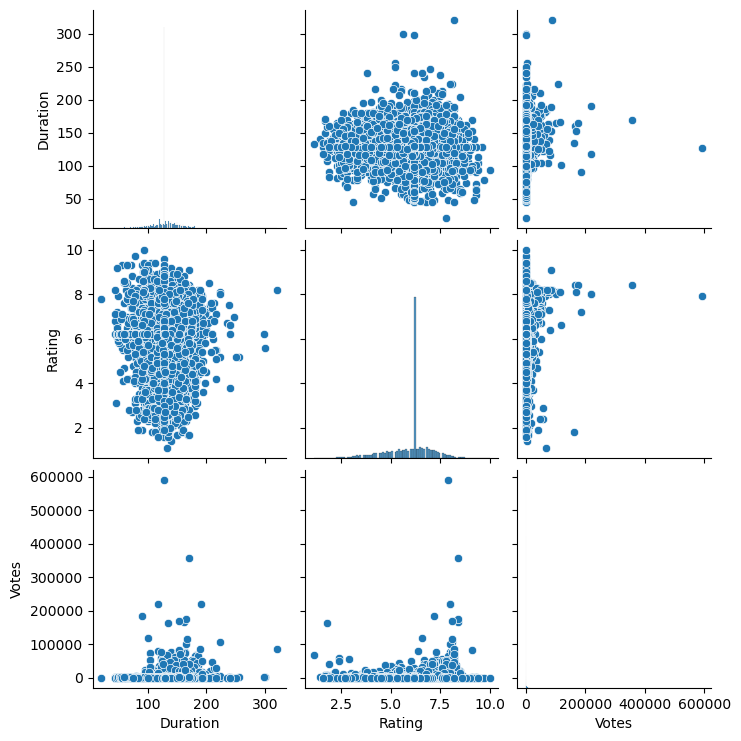

In [54]:
sns.pairplot(df)
plt.show()

In [55]:
non_num_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_num_columns)

Index(['Name', 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [56]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[num_columns].corr(method='spearman')

In [57]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [58]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [59]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [60]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

In [61]:
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map), 1)

In [62]:
df.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

In [63]:
X = df[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = df['Rating']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [66]:
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))


Random Forest Regressor Metrics:
Mean Squared Error: 0.2646673444544634
Mean Absolute Error: 0.3028007213706088
R2 Score: 0.7996789969466171


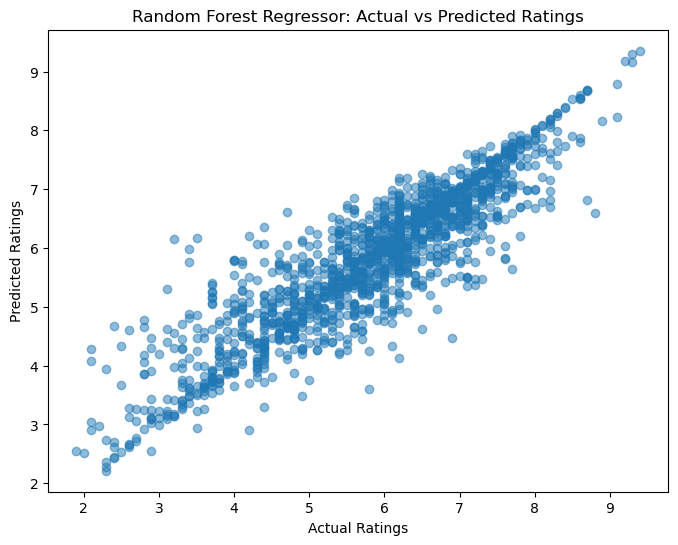

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()